 # Visualizion of a grib file using pygrib

pygrib will need to be installed prior to using this notebook.

In order to install pygrib, you can use conda: 

`conda install -c conda-forge pygrib`

In [1]:
import pygrib

<frozen importlib._bootstrap>:219: UserWarning: Warning: ecCodes 2.19.1 or higher is recommended. You are running 2.18.0.


In [2]:
# We'll be using widgets in the notebook
import ipywidgets as widgets 
from IPython.display import display

### Now to select a grib file
This can be any grib file, but you can use our example grib file in the `data/` directory of this repository.

In [3]:
grib_file = '../data/gdas.t12z.pgrb2.1p00.f000'

Opening a Grib file in pygrib is similar to any other file. 

Additionally, since it seeks to different byte offsets in the file, it only loads into memory what you ask.

In [4]:
fh = pygrib.open(grib_file)

In [5]:
num_messages = fh.messages
print(num_messages)

522


In [6]:
fh.message(1)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202012111200

Now we can select the variables

In [29]:
grib_messages = [(fh.message(i), i) for i in range(1,num_messages)]

w = widgets.Dropdown(
options=grib_messages,
value=1,
description="Select which grib message you would like to visualize")
display(w)

Dropdown(description='Select which grib message you would like to visualize', options=((1:Cloud mixing ratio:k…

In [34]:
w.value
fh.seek(w.value)
message = fh[w.value]
data = message.values

lats,lons = message.latlons()

### With your variable selected, we can now visualize the data.

In [9]:
import matplotlib.pyplot as plt # used to plot the data.
import cartopy.crs as ccrs # Used to georeference data.
import cartopy.util as cutil

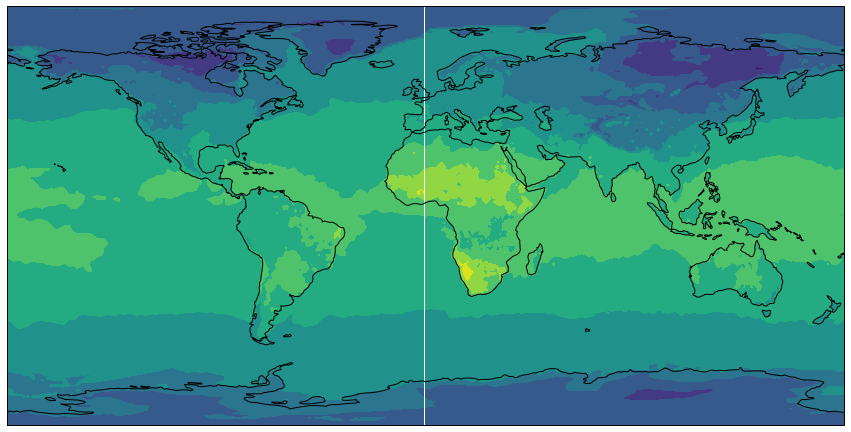

In [35]:
data = data.data
proj = ccrs.PlateCarree(central_longitude=0)
plt.gcf().set_size_inches(15,15)

ax = plt.axes(projection=proj)


plt.contourf(lons,lats,data, transform=proj)
ax.coastlines()


plt.show()


In [11]:
data, lons_1d = cutil.add_cyclic_point(data, coord=lons[0])

NotImplementedError: multi-dimensional slicing is not implemented

In [26]:
import numpy as np
data[np.where(data > 310)] = 310